# **Music Recommendation System**

## **Problem Definition**

### **The Context:**

 With rapid technological advancements, retaining users on a single platform has become increasingly challenging. Users gravitate toward platforms that deliver exactly what they're looking for without requiring explicit input. To capture and maintain their attention while they listen to music, a **music platform** should recommend songs based on users' **historical interactions**. This **personalized experience** can attract more users and significantly increase the platform's revenue.

In this project, we will explore techniques for building a **recommendation system**, using music as the primary example. However, the methods learned here can be applied to recommend any type of item, making this knowledge versatile for various domains beyond just music.

### **The objective:**

The goal of this project is to build various recommendation system to propose the top 10 songs for a user based on the liklihood of listening to those songs.
* Popularity Based Recommendation System
* Similarity Based Recommendation System
* Model Based Collaborative Filtering - Matrix Factorization
* Cluster Based Recommendation System
* Content Based Recommendation Systems

### **The key questions:**
What are the key questions that need to be answered?
* How can we ensure the recommendations are personalized and accurate?
* What metrics (e.g., precision, recall, F1-score, RMSE) will be used to measure the effectiveness of the system?
* What strategies will be implemented to address the "cold start" problem for new users or songs with limited data?
* How can recommendations increase user engagement and platform revenue?
* How do we ensure scalability and efficiency?
* Can the recommendation techniques be applied beyond music?



### **The problem formulation**:

- What is it that we are trying to solve using data science?
We are trying to solve the problem of personalizing the music experience for users by recommending songs they are likely to enjoy, based on their previous interactions and preferences. The main objectives we aim to address using data science include:
  * How can we keep users engaged on the platform
  * personalized song suggestions
  * Cold Start Problem

## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

**song_data**

- song_id - A unique id given to every song
- title - Title of the song
- Release - Name of the released album
- Artist_name - Name of the artist
- year - Year of release

**count_data**

- user _id - A unique id given to the user
- song_id - A unique id given to the song
- play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

### **Importing Libraries and the Dataset**

In [1]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
#Install the surprise library
!pip install surprise

zsh:1: command not found: pip


In [3]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd

# Import Matplotlib the Basic library for data visualization
import matplotlib.pyplot as plt

# Import seaborn - Slightly advanced library for data visualization
import seaborn as sns

# Import the required library to compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# Import defaultdict from collections A dictionary output that does not raise a key error
from collections import defaultdict
# Impoort mean_squared_error : a performance metrics in sklearn
from sklearn.metrics import mean_squared_error

#label encoding
from sklearn.preprocessing import LabelEncoder

### **Load the dataset**

In [4]:
# Importing the datasets
count_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone_project/count_data.csv')
song_df =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone_project/song_data.csv')

### **Understanding the data by viewing a few observations**

In [5]:
# Display first 10 records of count_df data
count_df.head(10)

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [6]:
# Display first 10 records of song_df data
song_df.head(10)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


### **Let us check the data types and and missing values of each column**

In [7]:
# Display info of count_df
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [8]:
# Display info of song_df
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999983 non-null   object
 2   release      999993 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


#### **Observations and Insights:**
__About count_df  dataset__: This dataframe has 2000000 entries and 4 columns(unnamed:0, user_id,song_id,play_count)
* Unnamed:0 column is a copy of index ,so its not usefull for our calculations
* user_id,song_id columns are of object datatype, for out analysis in the coming sections ,there is a chance of converting it to numerical types
* play_count is of integer type.

__About song_df  dataset__: This dataframe has 1000000 entries and 5 columns (song_id,title,release,artist_name,year)
Except year column all other columns are of object type and year is of integer type.
There is a common columns in both the dataframe that is song_id, using this column we can join both the dataframes.

The dataset is very huge ,so its better to trim the data inoder to reduce the processing time

In [9]:
# Left merge count_df and song_df on "song_id". Drop duplicates from song_df data simultaneously
count_data = pd.merge(count_df, song_df, on='song_id', how='left').drop_duplicates()
# Drop the column 'Unnamed: 0'
count_data.drop('Unnamed: 0', axis=1, inplace=True)
## Name the obtained dataframe as "df"
df = count_data

**Think About It:** As the user_id and song_id are encrypted. Can they be encoded to numeric features?


In [10]:
# Apply label encoding for "user_id" and "song_id"
#Initialize LabelEncoder for user_id and song_id
user_encoder = LabelEncoder()
song_encoder = LabelEncoder()
#fit and transform the user_id and song_id columns
df['user_id'] = user_encoder.fit_transform(df['user_id'])
df['song_id'] = song_encoder.fit_transform(df['song_id'])
df.head()

,user_id,song_id,play_count,title,release,artist_name,year
0,54961,153,1,The Cove,Thicker Than Water,Jack Johnson,0
1,54961,413,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,54961,736,1,Stronger,Graduation,Kanye West,2007
4,54961,750,1,Constellations,In Between Dreams,Jack Johnson,2005
5,54961,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


**Think About It:** As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?

A dataset of size 2000000 rows x 7 columns can be quite large and may require a lot of computing resources to process. This can lead to long processing times and can make it difficult to train and evaluate your model efficiently.
In order to address this issue, it may be necessary to trim down your dataset to a more manageable size.

In [11]:
# Get the column containing the users
users = df.user_id

# Create a dictionary that maps users(listeners) to the number of songs that they have listened to
playing_count = dict()

for user in users:
    # If we already have the user, just add 1 to their playing count
    if user in playing_count:
        playing_count[user] += 1

    # Otherwise, set their playing count to 1
    else:
        playing_count[user] = 1

In [12]:
# We want our users to have listened at least 90 songs
SONG_COUNT_CUTOFF = 90

# Create a list of users who need to be removed
remove_users = []

for user, num_songs in playing_count.items():

    if num_songs < SONG_COUNT_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

In [13]:
# Get the column containing the songs
songs = df.song_id

# Create a dictionary that maps songs to its number of users(listeners)
playing_count = dict()

for song in songs:
    # If we already have the song, just add 1 to their playing count
    if song in playing_count:
        playing_count[song] += 1

    # Otherwise, set their playing count to 1
    else:
        playing_count[song] = 1

In [14]:
# We want our song to be listened by atleast 120 users to be considred
LISTENER_COUNT_CUTOFF = 120

remove_songs = []

for song, num_users in playing_count.items():
    if num_users < LISTENER_COUNT_CUTOFF:
        remove_songs.append(song)

df_final= df.loc[ ~ df.song_id.isin(remove_songs)]

Out of all the songs available, songs with play_count less than or equal to 5 are in almost 90% abundance. So for building the recommendation system let us consider only those songs.

In [15]:
# Keep only records of songs with play_count less than or equal to (<=) 5
df_final = df_final[df_final.play_count<=5]

In [16]:
# Check the shape of the data
df_final.shape

(138301, 7)

## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [17]:
# Display total number of unique user_id
df_final.user_id.nunique()

3337

Total number of unique song id

In [18]:
# Display total number of unique song_id
df_final.song_id.nunique()

620

Total number of unique artists

In [19]:
# Display total number of unique artists
df_final.artist_name.nunique()

247

#### **Observations and Insights:** ***[RE-VERIFY]***
There are
3337 unique users
620 unique songs
247 unique artists
Number of users are more than the songs


### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [20]:
df_final.song_id.value_counts()

,count
song_id,
8582,1602
6293,1264
3567,982
4270,960
1286,920
...,...
8324,103
7747,99
4831,98


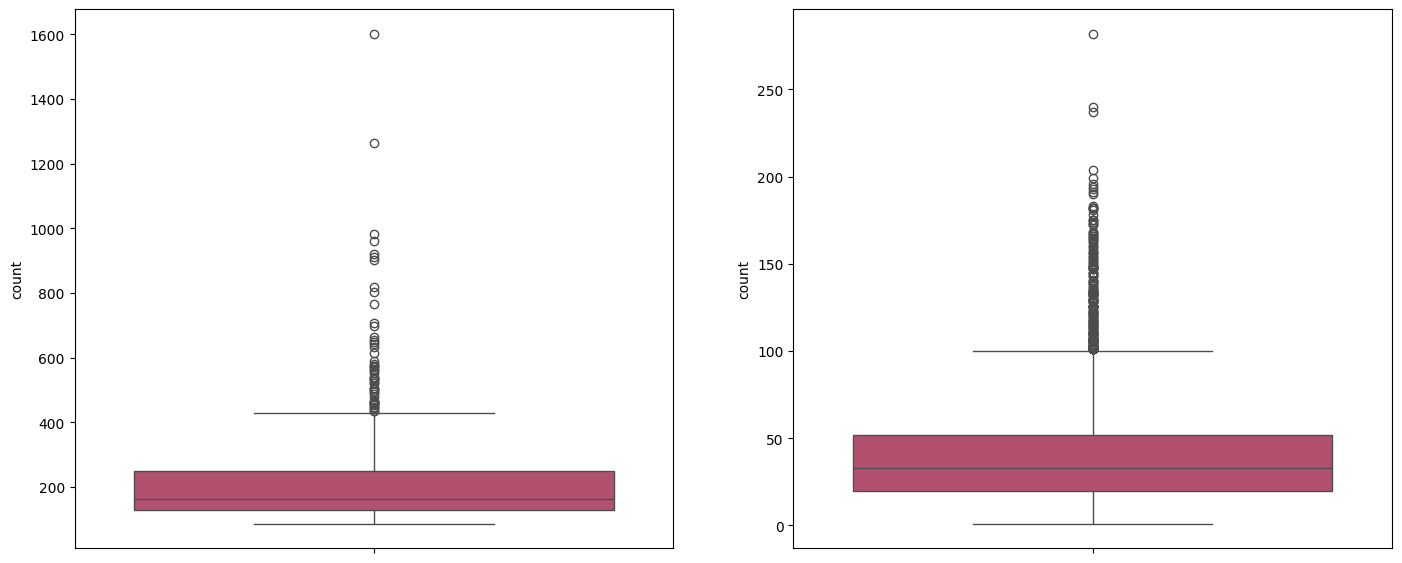

In [21]:
fig,axs = plt.subplots(1,2,figsize=(17,7))
sns.boxplot(data=df_final.song_id.value_counts(),ax=axs[0],palette='flare')
axs[0].set_xlabel='song_id'
axs[0].set_ylabel='play_count'
axs[0].set_title='Boxplot of song play_count'

sns.boxplot(data=df_final.user_id.value_counts(),ax=axs[1],palette='flare')
axs[1].set_xlabel='user_id_id'
axs[1].set_ylabel='play_count'
axs[1].set_title='Boxplot of user play_count'
fig.show()

Most interacted users

In [22]:
df_final.user_id.value_counts()

,count
user_id,
61472,282
15733,240
37049,237
9570,204
10763,199
...,...
33657,1
17961,1
14439,1


#### **Observations and Insights:**
Below are the Top 5 Songs which are listened by many users:

* songid - user count
* 8582 -1602
* 6293 -1264
* 3567 -982
* 4270 -960
* 1286 -920
maximum songs have play count more than 600

Below are the Top 5 users who listned many songs:

* userid -song count
* 61472 -282
* 15733 -240
* 37049 -237
* 9570 -204
* 10763 -199
maximum user have song count more than 150

Only few outliers are present


Songs released on yearly basis

In [23]:
# Find out the number of songs released in a year, use the songs_df
  # Hint: Use groupby function on the 'year' column
song_df.groupby('year').count()['title'].shape

(90,)

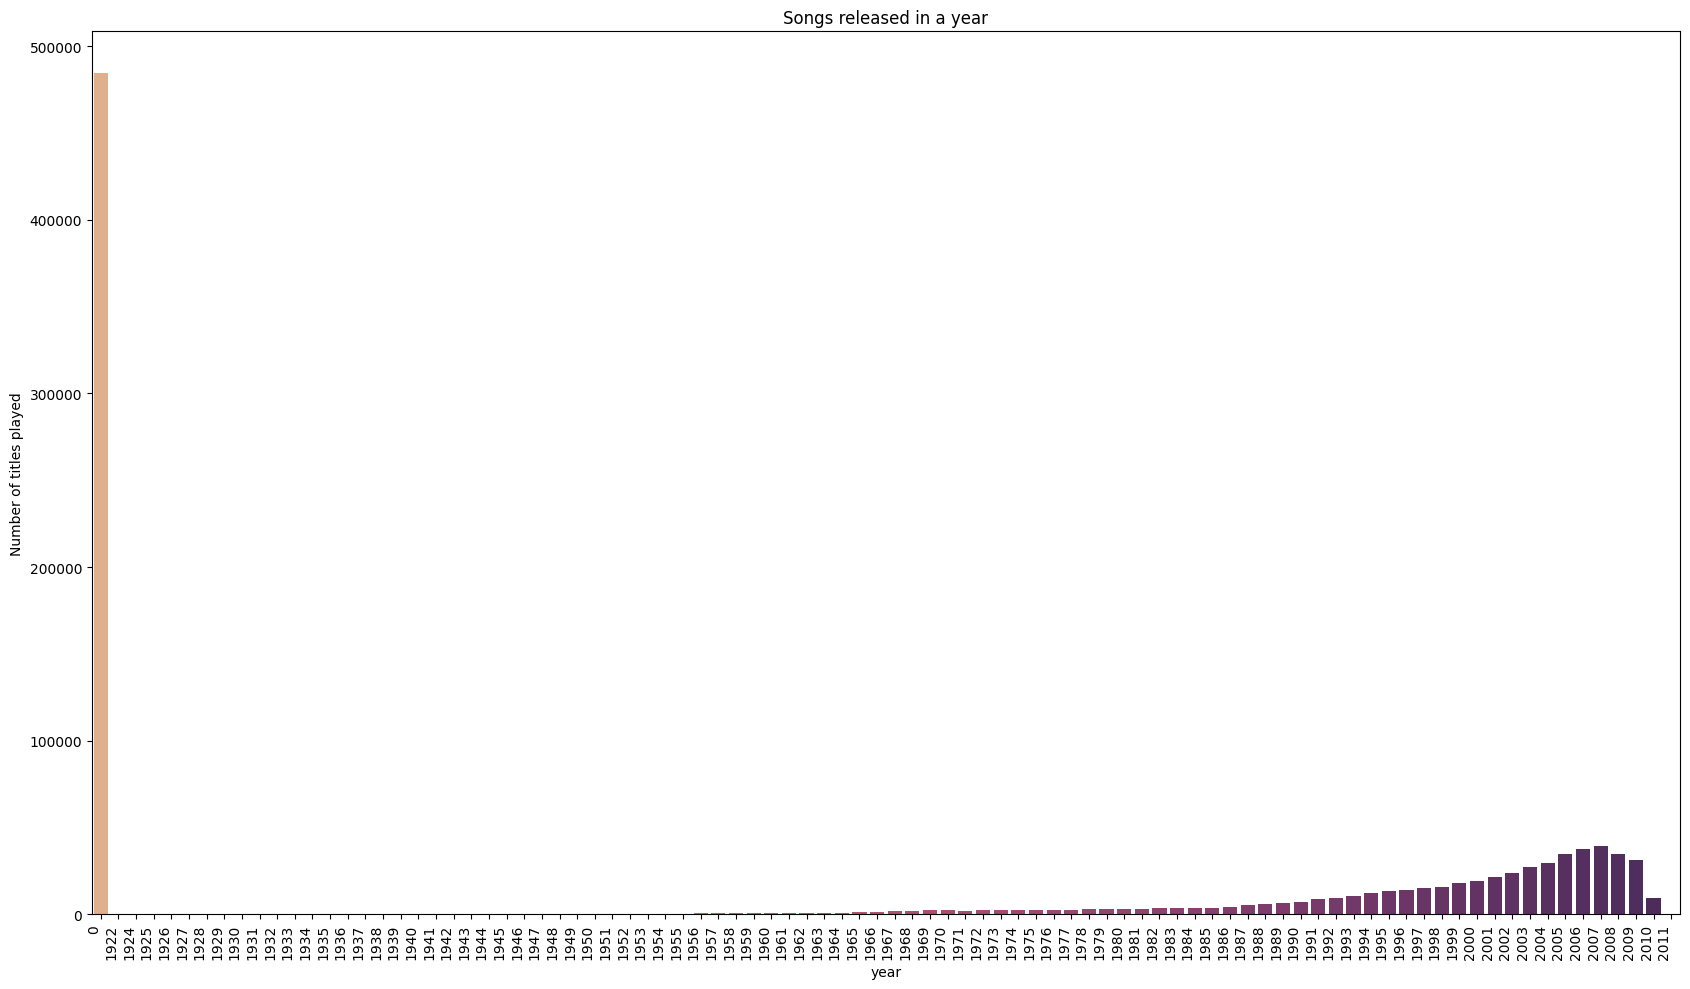

In [24]:
# Create a barplot plot with y label as "number of titles played" and x -axis year
data = song_df.groupby('year')['title'].count().reset_index()
# Set the figure size
plt.figure(figsize=(17,10))
# Set the x label of the plot
plt.xlabel('year')
# Set the y label of the plot
plt.ylabel('Number of titles played')
# Set the title of the plot
plt.title('Songs released in a year')
# Show the plot
sns.barplot(x='year', y='title', data=data, order=data['year'].sort_values(),palette='flare')
plt.xticks(rotation=90,ha='right')
plt.tight_layout()
plt.show()

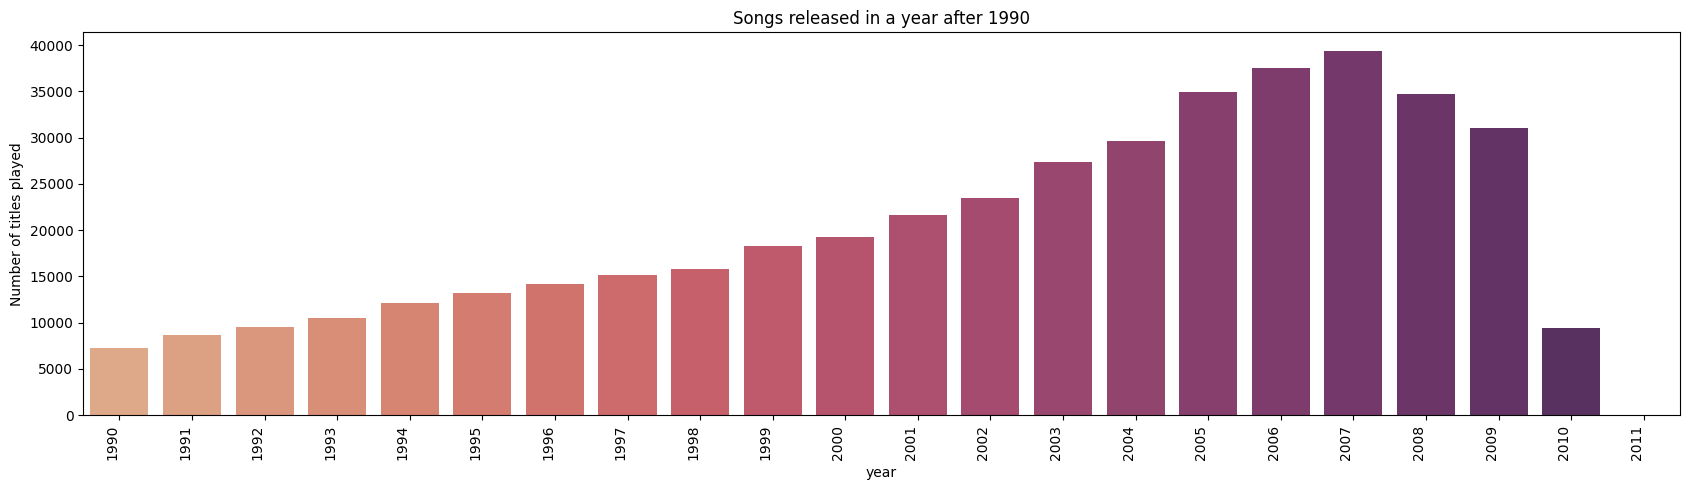

In [25]:

# Create a barplot plot with y label as "number of titles played" and x -axis year
data_filtered = song_df[song_df['year']>=1990].groupby('year')['title'].count().reset_index()
# Set the figure size
plt.figure(figsize=(17,5))
# Set the x label of the plot
plt.xlabel('year')
# Set the y label of the plot
plt.ylabel('Number of titles played')
# Set the title of the plot
plt.title('Songs released in a year after 1990')
# Show the plot
sns.barplot(x='year', y='title', data=data_filtered, order=data_filtered['year'].sort_values(),palette='flare')
plt.xticks(rotation=90,ha='right')
plt.tight_layout()
plt.show()

#### **Observations and Insights:** #
We can observe the trend in the above graph, after 1956 people started listening to music and after 1990 most of the people started listening to various songs and during 2006 to 2008 the pcumnt was maximum.

Most of tehe data we have is with out year so , we can see the count in 0 has reached maximum.

**Think About It:** What other insights can be drawn using exploratory data analysis?

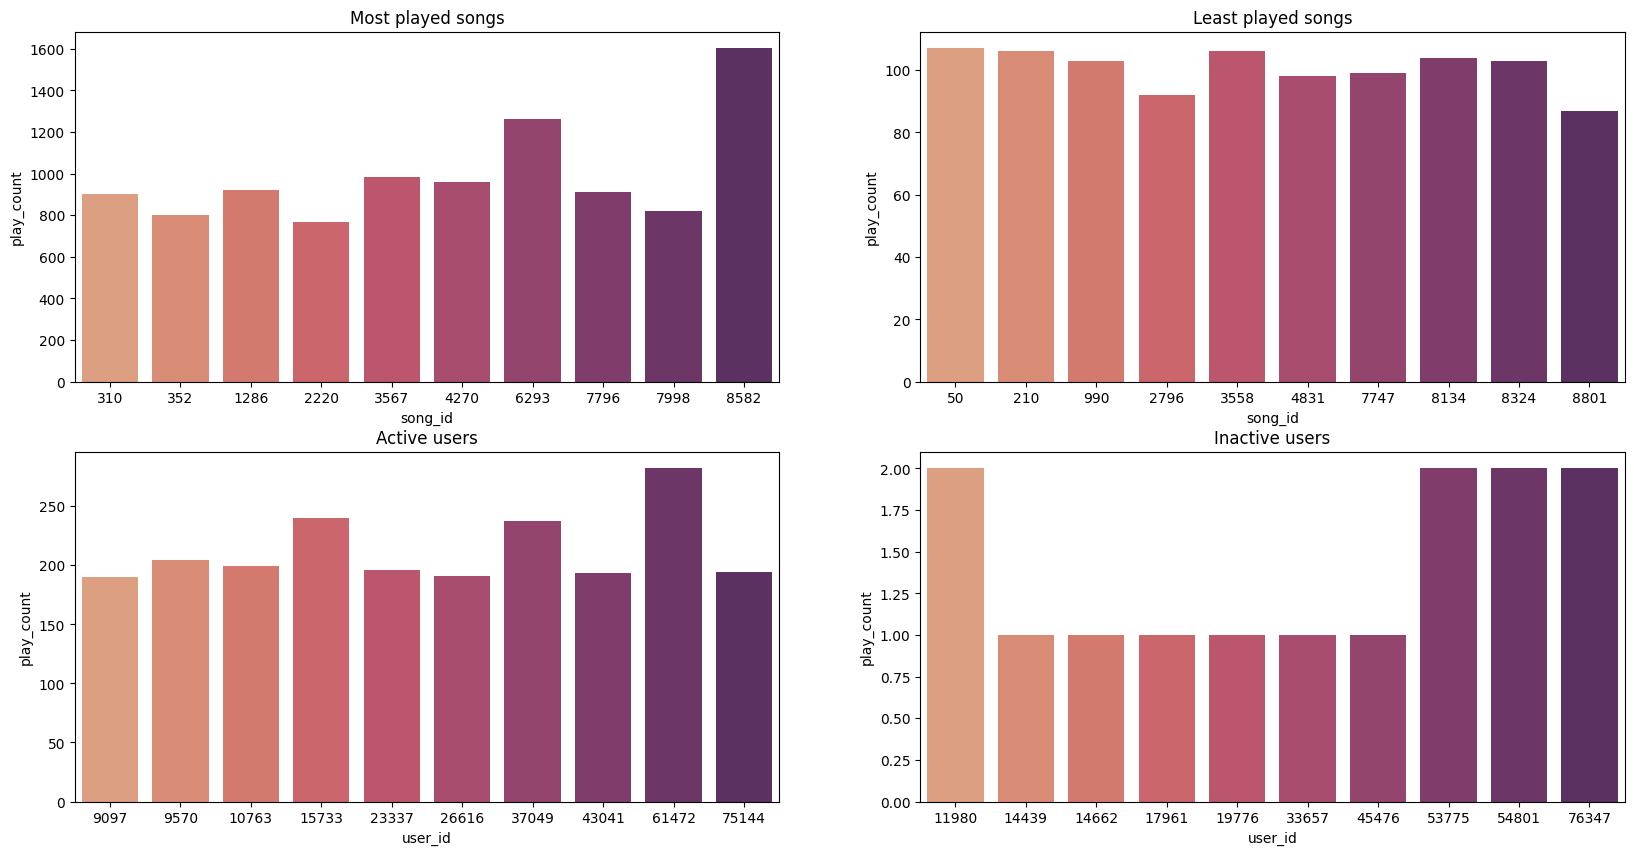

In [26]:
#Song popularity
fig,axs = plt.subplots(2,2,figsize=(20,10))
sns.barplot(data=df_final.groupby('song_id').count()['play_count'].sort_values(ascending=False)[:10],ax=axs[0,0],palette='flare')
axs[0,0].set_xlabel('song_id')
axs[0,0].set_ylabel('play_count')
axs[0,0].set_title('Most played songs')

sns.barplot(data=df_final.groupby('song_id').count()['play_count'].sort_values(ascending=True)[:10],ax=axs[0,1],palette='flare')
axs[0,1].set_xlabel('song_id')
axs[0,1].set_ylabel('play_count')
axs[0,1].set_title('Least played songs')
#Active and inactive users
sns.barplot(data=df_final.groupby('user_id').count()['play_count'].sort_values(ascending=False)[:10],ax=axs[1,0],palette='flare')
axs[1,0].set_xlabel('user_id')
axs[1,0].set_ylabel('play_count')
axs[1,0].set_title('Active users')

sns.barplot(data=df_final.groupby('user_id').count()['play_count'].sort_values(ascending=True)[:10],ax=axs[1,1],palette='flare')
axs[1,1].set_xlabel('user_id')
axs[1,1].set_ylabel('play_count')
axs[1,1].set_title('Inactive users')

plt.show()



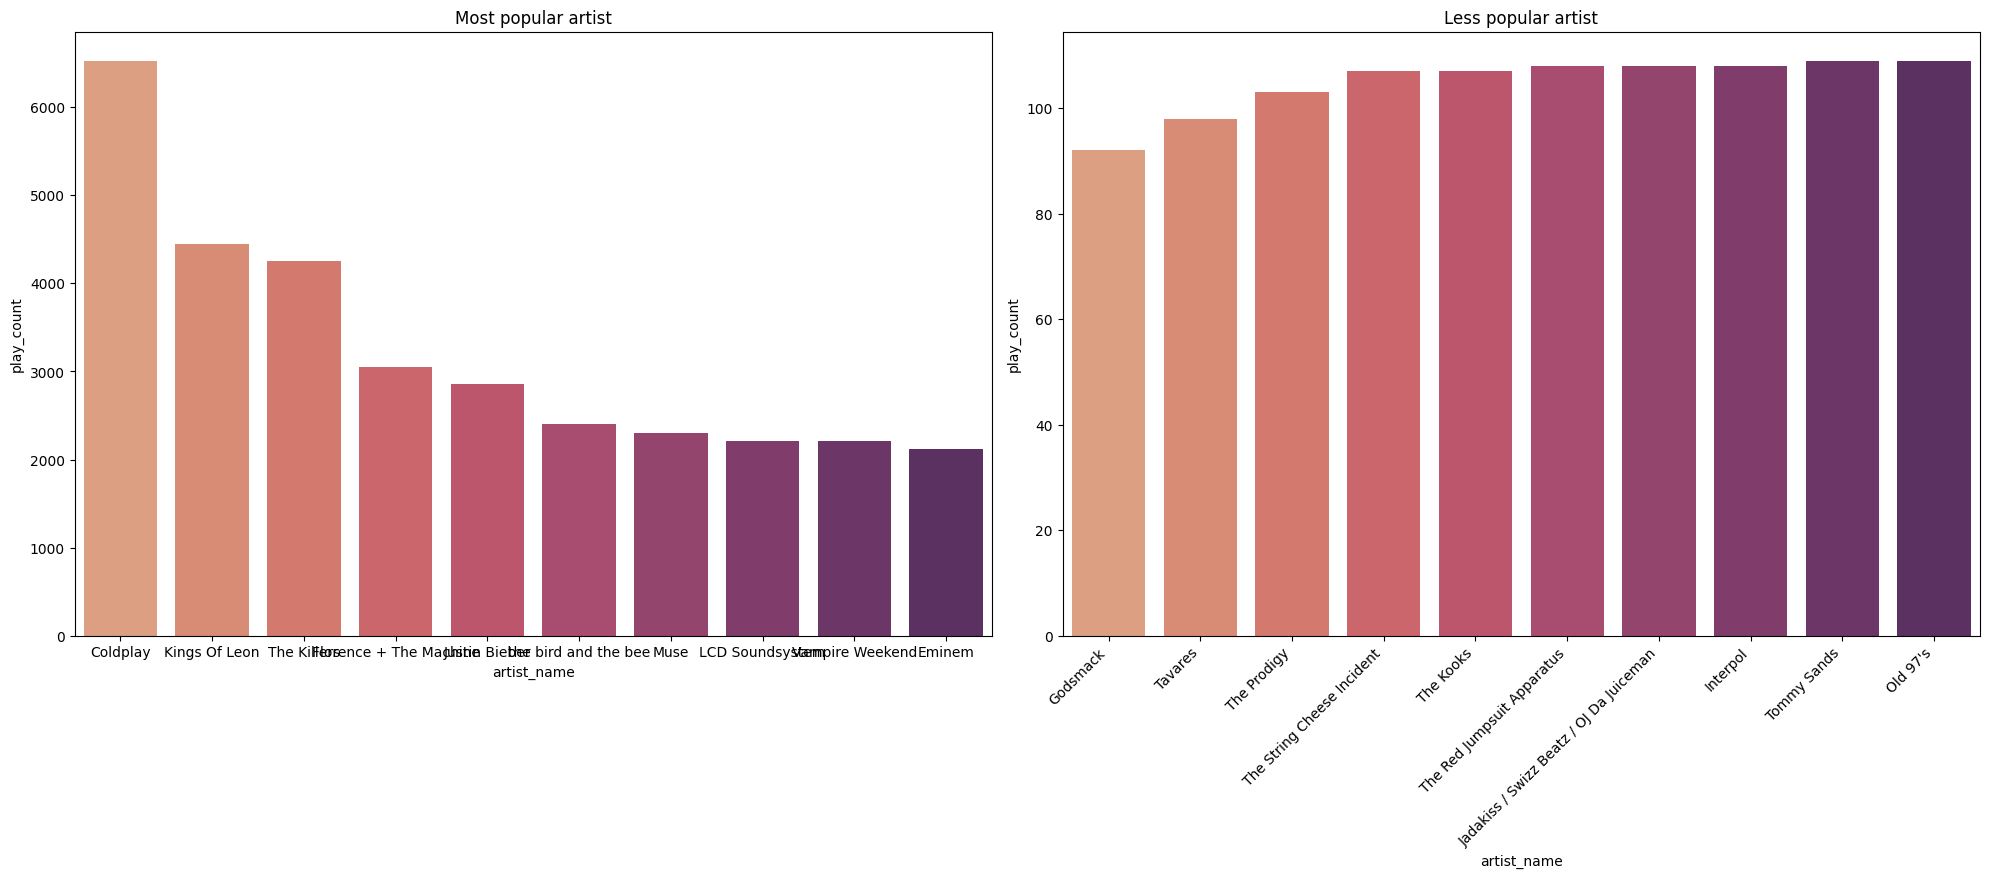

In [27]:
#Most popular artists and least popular artists
fig,axs = plt.subplots(1,2,figsize=(20,7))
sns.barplot(data=df_final.groupby('artist_name').count()['play_count'].sort_values(ascending=False)[:10],ax=axs[0],palette='flare')
axs[0].set_xlabel('artist_name')
axs[0].set_ylabel('play_count')
axs[0].set_title('Most popular artist')


sns.barplot(data=df_final.groupby('artist_name').count()['play_count'].sort_values(ascending=True)[:10],ax=axs[1],palette='flare')
axs[1].set_xlabel('artist_name')
axs[1].set_ylabel('play_count')
axs[1].set_title('Less popular artist')
plt.tight_layout()
plt.xticks(rotation=45,ha='right')
plt.show()

Text(37.722222222222214, 0.5, 'Artist Hotness (Total Play Count)')

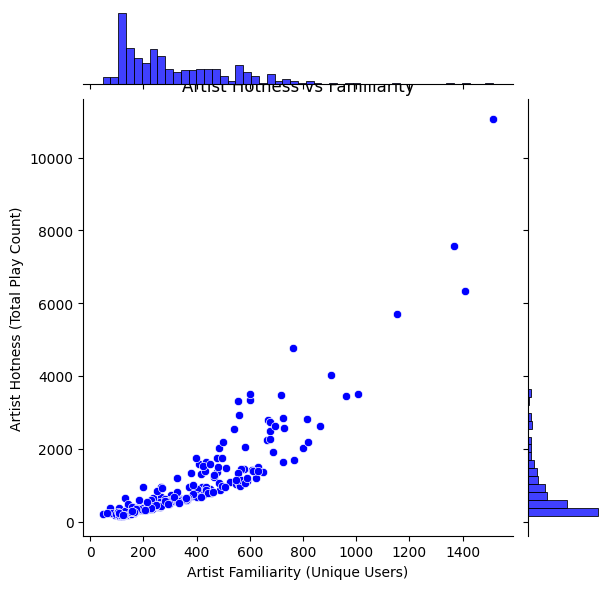

In [28]:

artist_stats = df_final.groupby('artist_name').agg(
    artist_hotness=('play_count', 'sum'),   # Total play count for hotness
    artist_familiarity=('user_id', 'nunique')  # Unique user count for familiarity
).reset_index()
sns.jointplot(x='artist_familiarity', y='artist_hotness',data=artist_stats, kind='scatter', color='blue', marginal_kws=dict(bins=50, fill=True),palette='flare')
plt.title('Artist Hotness vs Familiarity')
plt.xlabel('Artist Familiarity (Unique Users)')
plt.ylabel('Artist Hotness (Total Play Count)')


#### **Observations and Insights:** #
In the above graph we have considered only top 10 populars
* __Song popularity:__
  * All the top 10 songs are having playcount morethan 700
  * songid 8582 has maximum playcount
  * Least played or less popular songs has more than 90 counts
  * songid 8801 is the least played song


* __Active and inactive users:__
  * Majority of the top 10 active users have playcount more than 180 playcount
  * active users is 61472 userid
  * Majority of the top 10 inactive users have playcount 1
  * there are 6 top inactive users who have playcount 1

* __Most popular artists and least popular artists:__
  * Popular artist is coldplay
  * Less popular artist is old 97s




Now that we have explored the data, let's apply different algorithms to build recommendation systems.

**Note:** Use the shorter version of the data, i.e., the data after the cutoffs as used in Milestone 1.

## Building various models

### **Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [29]:
# Calculating average play_count
       # Hint: Use groupby function on the song_id column
average_count = df_final.groupby('song_id')['play_count'].mean()
# Calculating the frequency a song is played
      # Hint: Use groupby function on the song_id column
play_freq = df_final.groupby('song_id')['play_count'].count()


In [30]:
# Making a dataframe with the average_count and play_freq
final_play = pd.DataFrame({'avg_count':average_count,'play_freq':play_freq})
# Let us see the first five records of the final_play dataset
final_play.head()

,avg_count,play_freq
song_id,,
21,1.631387,274
22,1.464286,140
50,1.616822,107
52,1.715232,453
62,1.727273,121


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [31]:
# Build the function to find top n songs
def top_n_songs(data, n, min_playcounts):
  #Finding songs with minimum number of playcounts
  recommendations = data['play_freq']>min_playcounts
  #sorting values with respect to average count
  recommendations.sort_values(ascending=False,inplace=True)
  return recommendations.index[:n]

In [32]:
# Recommend top 10 songs using the function defined above
top_n_songs(final_play,10,50)

Index([21, 6646, 6500, 6525, 6572, 6587, 6618, 6630, 6636, 6682], dtype='int64', name='song_id')

### **User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity-based and subsequent models we will use the "surprise" library.

In [33]:
# Install the surprise package using pip. Uncomment and run the below code to do the same

!pip install surprise

In [34]:
# Import necessary libraries

# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# For implementing KFold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

### Some useful functions

Below is the function to calculate precision@k and recall@k, RMSE, and F1_Score@k to evaluate the model performance.

**Think About It:** Which metric should be used for this problem to compare different models?

In [35]:
def precision_recall_at_k(model, k=30, threshold=1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)

    #Making predictions on the test data
    predictions = model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, playing_count in user_est_true.items():

        # Sort play count by estimated value
        playing_count.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in playing_count)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in playing_count[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in playing_count[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    #Mean of all the predicted precisions are calculated.
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)),3)
    #Mean of all the predicted recalls are calculated.
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)),3)

    accuracy.rmse(predictions)
    print('Precision: ', precision) #Command to print the overall precision
    print('Recall: ', recall) #Command to print the overall recall
    print('F_1 score: ', round((2*precision*recall)/(precision+recall),3)) # Formula to compute the F-1 score.

**Think About It:** In the function precision_recall_at_k above the threshold value used is 1.5. How precision and recall are affected by changing the threshold? What is the intuition behind using the threshold value of 1.5?

Below we are loading the **dataset**, which is a **pandas dataframe**, into a **different format called `surprise.dataset.DatasetAutoFolds`** which is required by this library. To do this we will be **using the classes `Reader` and `Dataset`**

You will also notice here that we read the dataset by providing a scale of ratings. However, as you would know, we do not have ratings data of the songs. In this case, we are going to use play_count as a proxy for ratings with the assumption that the more the user listens to a song, the higher the chance that they like the song

In [36]:
# Instantiating Reader scale with expected rating scale
 #use rating scale (0, 5)
reader = Reader(rating_scale=(0, 5.0))
# Loading the dataset
 # Take only "user_id","song_id", and "play_count"
reader_data = Dataset.load_from_df(df_final[['user_id','song_id','play_count']],reader)
# Splitting the data into train and test dataset
 # Take test_size = 0.4, random_state = 42
trainset,testset = train_test_split(reader_data,test_size=0.4,random_state=42)

**Think About It:** How changing the test size would change the results and outputs?

In [37]:
# Build the default user-user-similarity model
similarity_options = {
      'name': 'cosine',     # Cosine similarity
      'user_based': True    # This is for user-user similarity
  }

# KNN algorithm is used to find desired similar items
 # Use random_state = 1
user_user_cf_model = KNNBasic(sim_options=similarity_options, Verbose=False, random_state=1)
# Train the algorithm on the trainset, and predict play_count for the testset
user_user_cf_model.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
 # Use sim_user_user model
precision_recall_at_k(user_user_cf_model,k=30,threshold=3.5)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0817
Precision:  0.005
Recall:  0.003
F_1 score:  0.004


**Observations and Insights:**
* The model's performance seems to be lacking, as indicated by the __low precision, recall, and F1 score__, despite having a reasonable RMSE. This suggests that while the model's predictions are numerically close to the actual values, it struggles to recommend relevant items effectively.

In [38]:
# Predicting play_count for a sample user with a listened song
# Use any user id  and song_id
user_user_cf_model.predict(uid=6958, iid=1671)

Prediction(uid=6958, iid=1671, r_ui=None, est=1.7227331119335394, details={'actual_k': 40, 'was_impossible': False})

In [39]:
# Predicting play_count for a sample user with a song not-listened by the user
 #predict play_count for any sample user
user_user_cf_model.predict(uid=8194, iid=3232)

Prediction(uid=8194, iid=3232, r_ui=None, est=1.5954023343246007, details={'actual_k': 40, 'was_impossible': False})

In [40]:
#Below is the function to find the list of users who have not listened to specific songs
def n_users_not_listened_song(n, data, song):
    users_listened_song = set(data[data['song_id'] == song]['user_id'])
    all_users = set(data['user_id'])
    return list(all_users.difference(users_listened_song))[:n] # where n is the number of elements to get in the list

In [41]:
n_users_not_listened_song(5, df_final, '3232')

[8194, 49157, 32773, 8199, 40969]

**Observations and Insights:_________**

**Predicting play_count for a sample user with a listened song**
The predicted rating of 1.72 suggests that the user might not find item 1671 very appealing. Depending on the rating scale, this could imply that they might not like the song or product at all.

The use of 40 neighbors indicates that the model is leveraging a considerable amount of user interaction data, which can be a good sign of robustness, provided those neighbors are indeed similar in preferences.

**Predicting play_count for a sample user with a song not-listened by the user**
The predicted rating of 1.60 suggests that the model predicts user 8194 is likely to have a low interest in item 3232. Depending on the rating scale, this could imply that the user may not like this item at all.


Now, let's try to tune the model and see if we can improve the model performance.

In [45]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {
    'k': [20, 30, 40],  # Number of neighbors
    'min_k': [1, 5, 10],  # Minimum number of neighbors
   'sim_options': {
        'name': ['cosine', 'msd', 'pearson', 'pearson_baseline'],  # Similarity measures
        'user_based': [True]  # We can also add False if you want item-based
    }
}

# Performing 3-fold cross-validation to tune the hyperparameters
# Initialize the KNNBasic algorithm
# Perform Grid Search
grid_search = GridSearchCV(KNNBasic, param_grid, measures=['rmse', 'mae'], cv=3)
#Fitting the data
grid_search.fit(reader_data)

# Get the best RMSE score and corresponding parameters
best_rmse = grid_search.best_score['rmse']
best_params = grid_search.best_params['rmse']

# Best RMSE score
print("Best RMSE score: ", best_rmse)
# Combination of parameters that gave the best RMSE score
print("Best parameters: ", best_params)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done 

In [46]:
# Train the best model found in above gridsearch
tuned_user_user_cf_model = KNNBasic(k=best_params['k'], min_k=best_params['min_k'], sim_options=best_params['sim_options'])
tuned_user_user_cf_model.fit(trainset)  # Fit the final model

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


**Observations and Insights:**
Since we got less accurate result with the previously trained cosine similarity model,
Decided to yperparameter tuning with the below option.
param_grid = {
    'k': [5, 10, 20, 30, 40],  # Number of neighbors
    'min_k': [1, 5, 10],  # Minimum number of neighbors
   'sim_options': {
        'name': ['cosine', 'msd', 'pearson', 'pearson_baseline'],  # Similarity measures
        'user_based': [True]  # We can also add False if you want item-based
    }
}

Since we are taking various number of neighbours and similarity measure , model training will take much time , but once the result comes then we can use perticular matrix for training this leads to less running time evrytime

In [96]:
precision_recall_at_k(tuned_user_user_cf_model,k=30,threshold=3.5)

RMSE: 1.0131
Precision:  0.079
Recall:  0.038
F_1 score:  0.051


In [47]:
# Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui = 2
tuned_user_user_cf_model.predict(uid=6958, iid=1671,r_ui=2)

Prediction(uid=6958, iid=1671, r_ui=2, est=1.9453672719637054, details={'actual_k': 24, 'was_impossible': False})

In [48]:
def n_songs_not_listened_by_user(n, data, user):
    users_listened_song = set(data[data['user_id'] == user]['song_id'])
    all_songs = set(data['song_id'])
    return list(all_songs.difference(users_listened_song))[:n] # where n is the number of elements to get in the list
n_songs_not_listened_by_user(5, df_final, '6958')

[2048, 6148, 2054, 21, 22]

In [49]:
# Predict the play count for a song that is not listened to by the user (with user_id 6958)
tuned_user_user_cf_model.predict(uid=6958, iid=2048)


Prediction(uid=6958, iid=2048, r_ui=None, est=1.9156781044223756, details={'actual_k': 18, 'was_impossible': False})

**Observations and Insights:______________**
**Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui = 2**
The predicted rating is now closer to the actual rating, with a small difference of 0.0547. This indicates a slight improvement in the prediction accuracy after tuning compared to the previous model where the predicted rating was 1.72. The model is now performing better at predicting the user’s potential preferences for items they’ve already interacted with.

**Predict the play count for a song that is not listened to by the user (with user_id 6958)**
Since the user hasn't interacted with item 2048, the predicted rating (est = 1.9157) suggests a low interest in the item, similar to the previous prediction (est = 1.60 for an unseen song).
The slightly higher predicted rating (1.9157) compared to the previous one (1.60) indicates a potential improvement in identifying items the user might have some interest in, though still low overall.

For the predictions above, the model utilized k=24 and k=18 neighbors, which were optimized from the original list of k=[5, 10, 20, 30, 40]. This shows the model is now using a more optimal number of neighbors to generate better predictions.


The hyperparameter tuning has helped the model make more accurate predictions by optimizing the number of neighbors, similarity metrics, and other parameters. This results in better personalization of recommendations and an improved ability to predict user preferences, even for unseen items. The model is now more fine-tuned to the user’s tastes, which is a significant outcome of the tuning process.

**Think About It:** Along with making predictions on listened and unknown songs can we get 5 nearest neighbors (most similar) to a certain song?

In [50]:
# Use inner id 0
#user who has listened to the song
inner_user_id = tuned_user_user_cf_model.trainset.to_inner_uid(6958)
neighbours = tuned_user_user_cf_model.get_neighbors(inner_user_id, 5)
print('user who has listened to the song',neighbours)
#user who has not listened to the song
inner_user_id = tuned_user_user_cf_model.trainset.to_inner_uid(8194)
neighbours = tuned_user_user_cf_model.get_neighbors(inner_user_id, 5)
print('user who has not listened to the song',neighbours)

user who has listened to the song [1187, 1331, 27, 203, 991]
user who has not listened to the song [58, 516, 728, 1707, 623]


Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [51]:
def get_recommendations(data, user_id, top_n, algo):
    # Creating an empty list to store the recommended song ids
    recommendations = []

    # Creating an user item interactions matrix
    user_item_interactions_matrix = data.pivot(index='user_id', columns='song_id', values='play_count')

    # Extracting those song ids which the user_id has not played yet
    non_interacted_songs = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()
    # Looping through each of the song ids which user_id has not interacted yet
    for item_id in non_interacted_songs:

        # Predicting the users for those non played song ids by this user
        est = algo.predict(user_id, item_id).est

        # Appending the predicted play_counts
        recommendations.append((item_id, est))
    # Sorting the predicted play_counts in descending order
    recommendations.sort(key=lambda x: x[1], reverse=True)

    return recommendations[:top_n]# Returing top n highest predicted play_count songs for this user

In [52]:
# Make top 5 recommendations for any user_id with a similarity-based recommendation engine

duplicate_entries = df_final[df_final.duplicated(subset=['user_id', 'song_id'], keep=False)]
#print(duplicate_entries)
data_aggregated = df_final.groupby(['user_id', 'song_id'], as_index=False).agg({'play_count': 'sum'})
recommendations = get_recommendations(data_aggregated, 6958, 5, tuned_user_user_cf_model)
recommendations

[(3165, 2.6525618256900025),
 (6716, 2.6389728556495338),
 (9019, 2.6059442318122956),
 (6079, 2.464149202533415),
 (3770, 2.4561252389939146)]

In [53]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
recommendations_df = pd.DataFrame(recommendations, columns=['song_id', 'predicted_play_count'])
recommendations_df

,song_id,predicted_play_count
0,3165,2.652562
1,6716,2.638973
2,9019,2.605944
3,6079,2.464149
4,3770,2.456125


**Observations and Insights:______________**
* With the hyperparameter tuned similarity-based recommendation engine following are the top 5 recommendation for the userid 6958


* [(3165, 2.6525618256900025),
 (6716, 2.6389728556495338),
 (9019, 2.6059442318122956),
 (6079, 2.464149202533415),
 (3770, 2.4561252389939146)]

### Correcting the play_counts and Ranking the above songs

In [54]:
def ranking_songs(recommendations, playing_count):
  # Sort the songs based on play counts
  ranked_songs = playing_count.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending = False)[['play_freq']].reset_index()
  # Merge with the recommended songs to get predicted play_counts
  ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns=['song_id', 'predicted_play_count']),how = 'inner',on = 'song_id')
  # Rank the songs based on corrected play_counts
  ranked_songs['corrected_play_count'] = ranked_songs['predicted_play_count']- 1/np.sqrt(ranked_songs.play_freq)
  # Sort the songs based on corrected play_counts
  ranked_songs.sort_values('corrected_play_count', ascending=False, inplace=True)
  # Return the top 5 recommendations
  return  ranked_songs

**Think About It:** In the above function to correct the predicted play_count a quantity 1/np.sqrt(n) is subtracted. What is the intuition behind it? Is it also possible to add this quantity instead of subtracting?

Popular songs (with high play_freq) might dominate the recommendations if the algorithm relies only on predicted play counts. Subtracting 1/np.sqrt(play_freq) reduces the bias toward frequently played songs, promoting more diverse or less-played tracks, and allowing room for discovery of less popular but potentially interesting songs.
For a song played 100 times, the correction is 1/10 = 0.1.
For a song played 10,000 times, the correction is only 1/100 = 0.01. This way, extremely popular songs get only a small correction, while less popular ones get more of a reduction in predicted play counts.

In [55]:
# Applying the ranking_songs function on the final_play data
ranking_songs(recommendations, final_play)
#recommendations

,song_id,play_freq,predicted_play_count,corrected_play_count
1,3165,368,2.652562,2.600433
4,6716,188,2.638973,2.566040
0,9019,464,2.605944,2.559520
2,6079,304,2.464149,2.406795
3,3770,198,2.456125,2.385058


**Observations and Insights:______________**
After correcting the playcounts and rankings
There is no much difference
There is slight variations in the predicted and corrected play count

### Item Item Similarity-based collaborative filtering recommendation systems

In [56]:
# Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model performance
# Declaring the similarity options
similarity_options = {
      'name': 'cosine',     # Cosine similarity
      'user_based': False    # This is for Item-Item similarity
  }
# KNN algorithm is used to find desired similar items. Use random_state=1
item_item_cf_model = KNNBasic(sim_options=similarity_options, Verbose=False, random_state=1)
# Train the algorithm on the trainset, and predict ratings for the test set
# Fit the model on the training data
item_item_cf_model.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(item_item_cf_model, k = 10, threshold = 3.5)


Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0320
Precision:  0.006
Recall:  0.007
F_1 score:  0.006


**Observations and Insights:______________**
By using item-item similarity, the model leverages the relationship between items based on the users who interact with them. This helps provide recommendations for items that are similar to what users have liked in the past.

The threshold for considering an item "relevant" is set at 3.5. This means that any predicted rating above 3.5 is assumed to be a good or relevant recommendation. This choice of threshold depends on the rating scale (e.g., if ratings range from 1 to 5).

In [57]:
# Predicting play count for a sample user_id 6958 and song (with song_id 1671) listened to by the user
item_item_cf_model.predict(uid=6958, iid=1671)

Prediction(uid=6958, iid=1671, r_ui=None, est=1.3695958289911163, details={'actual_k': 18, 'was_impossible': False})

In [58]:
n_users_not_listened_song(5, df_final, '1671')

[8194, 49157, 32773, 8199, 40969]

In [59]:
# Predict the play count for a user that has not listened to the song (with song_id 1671)
item_item_cf_model.predict(uid=33280, iid=3232)

Prediction(uid=33280, iid=3232, r_ui=None, est=1.741083278299966, details={'actual_k': 40, 'was_impossible': False})

**Observations and Insights:______________**

__Predicting play count for a sample user (user_id = 6958) and a song (song_id = 1671) listened to by the user:__
Given the low estimated value, it seems that the user might not have a high interest in continuing to listen to this song, despite having listened to it previously.

__Predicting play count for a user (user_id = 33280) who has not listened to the song (song_id = 3232):__
Despite the user not having any prior interaction with the song, the estimated play count is still 1.74, which is higher than the first prediction for user 6958, who has listened to the song.
The model uses a higher number of neighbors (40) in this case, which may provide a broader context for the prediction. This suggests that the song may have high similarity to many other items the user has interacted with, leading to a slightly higher play count prediction.

 Given the relatively low predicted values (both below 2), it is important to explore further fine-tuning or alternative recommendation strategies if the goal is to improve prediction accuracy, especially for more engaged users. Hyperparameter tuning, such as adjusting the number of neighbors, could potentially improve the prediction results.

In [60]:
# Apply grid search for enhancing model performance
# Setting up parameter grid to tune the hyperparameters
param_grid = {
  'k': [10, 20, 30],  # Number of neighbors
  'min_k': [3, 6, 9],  # Minimum number of neighbors
  'sim_options': {
    'name': ['msd', 'cosine'],  # Similarity measures
    'user_based': [False]  # Item-based collaborative filtering
  }
}

# Performing 3-fold cross-validation to tune the hyperparameters
grid_search = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3)
# Fitting the data
grid_search.fit(reader_data)

# Find the best RMSE score
best_rmse = grid_search.best_score['rmse']

# Extract the combination of parameters that gave the best RMSE score
best_params = grid_search.best_params['rmse']

# Best RMSE score
print("Best RMSE score: ", best_rmse)
# Combination of parameters that gave the best RMSE score
print("Best parameters: ", best_params)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matr

**Think About It:** How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the list of hyperparameters [here](https://surprise.readthedocs.io/en/stable/knn_inspired.html).

In [61]:
# Apply the best model found in the grid search
tuned_item_item_cf_model = KNNBasic(k=best_params['k'], min_k=best_params['min_k'], sim_options=best_params['sim_options'])
trainset = reader_data.build_full_trainset()  # Build the full training set from the data
tuned_item_item_cf_model.fit(trainset)  # Fit the final model
precision_recall_at_k(tuned_item_item_cf_model, k = 10, threshold = 3.5)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8178
Precision:  0.028
Recall:  0.018
F_1 score:  0.022


**Observations and Insights:______________**
* Improved Accuracy (RMSE): The model’s ability to predict actual play counts has improved after hyperparameter tuning, as indicated by the lower RMSE.
* Challenges with Recommendation Relevance: Despite better prediction accuracy, the low precision, recall, and F1-score show that the model struggles to consistently recommend relevant items to users. The recommendations may still be too generic or not closely aligned with user preferences.

In [62]:
# Predict the play_count by a user(user_id 6958) for the song (song_id 1671)
tuned_item_item_cf_model.predict(uid=6958, iid=1671)

Prediction(uid=6958, iid=1671, r_ui=None, est=1.2908008038121028, details={'actual_k': 30, 'was_impossible': False})

In [63]:
# Predicting play count for a sample user_id 6958 with song_id 3232 which is not listened to by the user
tuned_item_item_cf_model.predict(uid=6958, iid=3232)

Prediction(uid=6958, iid=3232, r_ui=None, est=1.5153817197044586, details={'actual_k': 30, 'was_impossible': False})

**Observations and Insights:______________**
Both predictions result in low ratings (1.29 and 1.52), suggesting that the user likely has a low level of interest in both songs. The predictions indicate that the user’s engagement with these items would probably be minimal.

The predicted ratings are similar for both the listened and unlistened songs. This suggests that the model identifies this user's preferences as leaning toward lower ratings across items, possibly indicating an overall low engagement with the items in this neighborhood.

In [64]:
# Find five most similar items to the item with inner id 0
item_inner_id=0
n=5
similar_items = tuned_item_item_cf_model.get_neighbors(item_inner_id, n)
similar_items

[48, 59, 90, 121, 139]

In [65]:
# Making top 5 recommendations for any user_id  with item_item_similarity-based recommendation engine
recommendations = get_recommendations(data_aggregated, 6958, 5, tuned_item_item_cf_model)
recommendations

[(9942, 1.8911178387601861),
 (4831, 1.679919928989588),
 (6860, 1.6118461466243426),
 (5344, 1.599607300965113),
 (4270, 1.5935923267106638)]

In [66]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations, columns=['song_id', 'predicted_play_count'])

,song_id,predicted_play_count
0,9942,1.891118
1,4831,1.679920
2,6860,1.611846
3,5344,1.599607
4,4270,1.593592


In [67]:
# Applying the ranking_songs function
ranking_songs(recommendations, final_play)


,song_id,play_freq,predicted_play_count,corrected_play_count
2,9942,159,1.891118,1.811813
4,4831,98,1.679920,1.578905
0,4270,960,1.593592,1.561317
1,6860,177,1.611846,1.536682
3,5344,123,1.599607,1.509440


**Observations and Insights:_________**
There is no big difference in rankings of predicted and corrected playcount

### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [68]:
# Build baseline model using svd
svd_model = SVD(random_state=1)
# Training the algorithm on the trainset
svd_model.fit(trainset)
# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd_model, k = 10, threshold = 3.5)

RMSE: 0.6590
Precision:  0.184
Recall:  0.103
F_1 score:  0.132


In [69]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2
svd_model.predict(uid=6958, iid=1671, r_ui=2)

Prediction(uid=6958, iid=1671, r_ui=2, est=1.4063526041916756, details={'was_impossible': False})

In [70]:
# Making a prediction for the user who has not listened to the song (song_id 3232)
svd_model.predict(uid=6958, iid=3232)

Prediction(uid=6958, iid=3232, r_ui=None, est=1.6092945251765034, details={'was_impossible': False})

#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [71]:
# Set the parameter space to tune
param_grid = {

    'n_epochs': [5, 10, 15, 20],
    'lr_all': [0.002, 0.005, 0.01],
    'reg_all': [0.02, 0.1, 0.5]
}

# Performe 3-fold grid-search cross-validation
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)

# Fitting data
gs.fit(reader_data)
# Best RMSE score
best_rmse = gs.best_score['rmse']
# Combination of parameters that gave the best RMSE score
best_params = gs.best_params['rmse']

print("Best RMSE score: ", best_rmse)
print("Best parameters: ", best_params)

Best RMSE score:  0.9853818059861593
Best parameters:  {'n_epochs': 20, 'lr_all': 0.01, 'reg_all': 0.1}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/matrix_factorization.html).

In [72]:
# Building the optimized SVD model using optimal hyperparameters
optimal_epochs = best_params['n_epochs']
optimal_lr_all = best_params['lr_all']
optimal_reg_all = best_params['reg_all']

tuned_svd = SVD(n_epochs = optimal_epochs, lr_all = optimal_lr_all, reg_all = optimal_reg_all)
# Train the algorithm on the trainset
tuned_svd.fit(trainset)
# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(tuned_svd, k = 10, threshold = 3.5)

RMSE: 0.7885
Precision:  0.074
Recall:  0.041
F_1 score:  0.053


**Observations and Insights:_________**
Decline in Performance After Tuning: Despite tuning the model with adjusted parameters, performance declined across all metrics (RMSE, precision, recall, and F1 score). The new parameter values may have resulted in overfitting, where the model became less generalizable to unseen data.

The baseline model showed significantly better performance than the tuned model, particularly in terms of RMSE, precision, and recall. This suggests that the baseline parameter settings were already optimal or that the tuned parameters were not well-suited for the dataset at hand.



In [73]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671
tuned_svd.predict(uid=6958,iid=1671)

Prediction(uid=6958, iid=1671, r_ui=None, est=1.2224628709585126, details={'was_impossible': False})

In [74]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline play_count
tuned_svd.predict(uid=6958,iid=3232)

Prediction(uid=6958, iid=3232, r_ui=None, est=1.3132770207192772, details={'was_impossible': False})

**Observations and Insights:_________**
Both predictions are very low on the rating scale, indicating that the model consistently predicts user 6958’s disinterest in these items. This suggests that the model has learned a pattern where this user has preferences that differ significantly from these items.

The predictions suggest that if these items are recommended to the user, they are unlikely to result in positive engagement, making them poor recommendations.

In [75]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm
recommendations = get_recommendations(data_aggregated, 6958, 5, tuned_svd)

In [76]:
# Ranking songs based on above recommendations
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_play_count,corrected_play_count
3,7224,109,2.571251,2.475469
2,6450,110,2.383049,2.287703
1,5531,664,2.105705,2.066897
0,2220,767,2.067235,2.031127
4,8324,103,2.079605,1.981072


**Observations and Insights:_________**

### Cluster Based Recommendation System

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [77]:
# Make baseline clustering model
# Using CoClustering algorithm
clust_baseline = CoClustering(random_state = 1)

# Training the algorithm on the train set
clust_baseline.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10
precision_recall_at_k(clust_baseline)

RMSE: 0.9698
Precision:  0.438
Recall:  0.653
F_1 score:  0.524


In [78]:
# Making prediction for user_id 6958 and song_id 1671
clust_baseline.predict(uid=6958,iid=1671)

Prediction(uid=6958, iid=1671, r_ui=None, est=1.2649284112936172, details={'was_impossible': False})

In [79]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not listened to by the user
clust_baseline.predict(uid=6958,iid=3232)

Prediction(uid=6958, iid=3232, r_ui=None, est=1.2556520959637232, details={'was_impossible': False})

#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [80]:
# Set the parameter space to tune
param_grid = {'n_cltr_u': [3, 4, 5, 6], 'n_cltr_i': [3, 4, 5, 6], 'n_epochs': [30, 40, 50]}
# Performing 3-fold grid search cross-validation
gs = GridSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(reader_data)

# Best RMSE score
best_rmse = gs.best_score['rmse']
# Combination of parameters that gave the best RMSE score
best_params = gs.best_params['rmse']

# Best RMSE score

print("Best RMSE score: ", best_rmse)
# Combination of parameters that gave the best RMSE score
print("Best Parameters",best_params)

Best RMSE score:  1.0360522062600672
Best Parameters {'n_cltr_u': 3, 'n_cltr_i': 5, 'n_epochs': 40}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/co_clustering.html).

In [81]:
# Train the tuned Coclustering algorithm
clust_tuned = CoClustering(n_cltr_u = 3, n_cltr_i = 3, n_epochs = 30, random_state = 1)
# Training the algorithm on the train set
clust_tuned.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10
precision_recall_at_k(clust_tuned)

RMSE: 0.9698
Precision:  0.439
Recall:  0.653
F_1 score:  0.525


**Observations and Insights:_________**
The tuned model shows almost no improvement in RMSE, precision, recall, or F1 score. This could indicate that the chosen hyperparameters might not have a significant impact, or further tuning with a different parameter range may be required.

Stable performance: Despite the minimal changes, the model is relatively stable and maintains the same level of prediction accuracy and balance between precision and recall.

In [82]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671
clust_tuned.predict(uid=6958,iid=1671)

Prediction(uid=6958, iid=1671, r_ui=None, est=1.264875015783286, details={'was_impossible': False})

In [83]:
# Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline play_count
clust_tuned.predict(uid=6958,iid=3232)

Prediction(uid=6958, iid=3232, r_ui=None, est=1.2527923641562548, details={'was_impossible': False})

**Observations and Insights:_________**
Both items 1671 and 3232 have very low estimated ratings for User 6958, indicating that these items are probably not appealing to this user. These predictions suggest that recommending these items to the user is not likely to result in engagement.

#### Implementing the recommendation algorithm based on optimized CoClustering model

In [84]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm
recommendations = get_recommendations(data_aggregated, 6958, 5, clust_tuned)

### Correcting the play_count and Ranking the above songs

In [85]:
# Ranking songs based on the above recommendations
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_play_count,corrected_play_count
4,7224,109,3.191058,3.095275
3,6450,110,2.442267,2.346921
0,5531,664,2.129808,2.091001
2,8483,130,2.131778,2.044072
1,614,401,2.060993,2.011056


**Observations and Insights:_________**

### Content Based Recommendation Systems

**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

In [86]:
df_final.head()

,user_id,song_id,play_count,title,release,artist_name,year
209,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
211,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
212,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
213,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
214,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007


In [87]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"
df_final['text'] = df_final['title']+ ' ' + df_final['release'] + ' ' + df_final['artist_name']
df_final.head()

,user_id,song_id,play_count,title,release,artist_name,year,text
209,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000,Daisy And Prudence Distillation Erin McKeown
211,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004,The Ballad of Michael Valentine Sawdust The Ki...
212,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007,I Stand Corrected (Album) Vampire Weekend Vamp...
213,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007,They Might Follow You Tiny Vipers Tiny Vipers
214,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007,Monkey Man You Know I'm No Good Amy Winehouse


In [88]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data

# Drop the duplicates from the title column
df_final.drop_duplicates(subset=['title'], inplace=True)
# Set the title column as the index
df_final.set_index('title', inplace=True)
# See the first 5 records of the df_small dataset
df_final.head()

,user_id,song_id,play_count,release,artist_name,year,text
title,,,,,,,
Daisy And Prudence,6958,447,1,Distillation,Erin McKeown,2000,Daisy And Prudence Distillation Erin McKeown
The Ballad of Michael Valentine,6958,512,1,Sawdust,The Killers,2004,The Ballad of Michael Valentine Sawdust The Ki...
I Stand Corrected (Album),6958,549,1,Vampire Weekend,Vampire Weekend,2007,I Stand Corrected (Album) Vampire Weekend Vamp...
They Might Follow You,6958,703,1,Tiny Vipers,Tiny Vipers,2007,They Might Follow You Tiny Vipers Tiny Vipers
Monkey Man,6958,719,1,You Know I'm No Good,Amy Winehouse,2007,Monkey Man You Know I'm No Good Amy Winehouse


In [89]:
# Create the series of indices from the data
index_series = pd.Series(df_final.index)
index_series

,title
0,Daisy And Prudence
1,The Ballad of Michael Valentine
2,I Stand Corrected (Album)
3,They Might Follow You
4,Monkey Man
...,...
624,The Last Song
625,Invincible
626,Paper Gangsta
627,Starlight


In [90]:
# Importing necessary packages to work with text data
import nltk
nltk.download('omw-1.4')
# Download punkt library
nltk.download('punkt')

# Download stopwords library
nltk.download('stopwords')

# Download wordnet
nltk.download('wordnet')

# Import regular expression
import re

# Import word_tokenizer
from nltk import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


We will create a **function to pre-process the text data:**

In [91]:
# Create a function to tokenize the text
def tokenize(text):

    # Making each letter as lowercase and removing non-alphabetical text
    text = re.sub(r"[^a-zA-Z]"," ", text.lower())

    # Extracting each word in the text
    tokens = word_tokenize(text)

    # Removing stopwords
    words = [word for word in tokens if word not in stopwords.words("english")]

    # Lemmatize the words
    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

In [92]:
# Create tfidf vectorizer
tfidf = TfidfVectorizer(tokenizer = tokenize)

# Fit_transfrom the above vectorizer on the text column and then convert the output into an array
song_tfidf = tfidf.fit_transform(df_final['text'].values).toarray()

In [93]:
# Compute the cosine similarity for the tfidf above output
similar_songs = cosine_similarity(song_tfidf, song_tfidf)
similar_songs

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.03257364],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.03257364, ..., 0.        , 0.        ,
        1.        ]])

 Finally, let's create a function to find most similar songs to recommend for a given song.

In [104]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):

    recommended_songs = []

    indices = pd.Series(df_final.index)

    # Getting the index of the song that matches the title
    idx = indices[indices == title].index[0]

    # Creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # Getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[1 : 11].index)
    #print(top_10_indexes)

    # Populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommended_songs.append(list(df_final.index)[i])

    return recommended_songs

Recommending 10 songs similar to Learn to Fly

In [113]:
# Make the recommendation for the song with title 'Learn To Fly'
song = 'Learn To Fly'
print(f"Content-Based Similarity Score for {song}: {similar_songs[0][0]}")
print(f"Recommendation for a {song}:{recommendations('Learn To Fly', similar_songs)}")

Content-Based Similarity Score for Learn To Fly: 1.0000000000000002
Recommendation for a Learn To Fly:['Big Me', 'Everlong', 'The Pretender', 'Nothing Better (Album)', 'From Left To Right', 'Lifespan Of A Fly', 'Daisy And Prudence', "Ghosts 'n' Stuff (Original Instrumental Mix)", 'Closer', 'No Cars Go']


# Hybrid **Model**

In [117]:
#Combine models in the hybrid
def hybrid_predict(user_id, song_id, weights):
    """
    Predict a rating by combining predictions from multiple models using weighted averaging.

    weights: a dict of model weights {model_name: weight}
    """
    # Get predictions from each model
    user_user_pred = tuned_user_user_cf_model.predict(user_id, song_id).est
    item_item_pred = tuned_item_item_cf_model.predict(user_id, song_id).est
    svd_pred = svd_model.predict(user_id, song_id).est
    cluster_pred = clust_tuned.predict(user_id, song_id).est

    # Weighted sum of predictions
    final_prediction = (weights['user_user'] * user_user_pred +
                        weights['item_item'] * item_item_pred +
                        weights['svd'] * svd_pred +
                        weights['cluster'] * cluster_pred)

    return final_prediction

In [118]:
weights = {
    'user_user': 0.10,        # Weight for User-User CF
    'item_item': 0.10,        # Weight for Item-Item CF
    'svd': 0.50,              # Weight for Matrix Factorization
    'cluster': 0.30,          # Weight for Cluster-Based

}
user_id = 6958
song_id = 1671
prediction = hybrid_predict(user_id, song_id, weights)
print(f"Hybrid Prediction for User {user_id} and Item {song_id}: {prediction}")


Hybrid Prediction for User 6958 and Item 1671: 1.4062556144084044


**Observations and Insights:_________**
The recommendations are likely based on various content features such as genre, tempo, instrumentation, or lyrical themes that align with "Learn To Fly."
Variety of Recommendations: The list includes songs that span various aspects of musical composition, which may appeal to listeners who enjoy "Learn To Fly."
Artist Variety: Some songs may come from different artists or albums, indicating that the recommendation system is broad in its scope rather than limited to a specific artist or style.
User Engagement: If the user enjoyed "Learn To Fly," there’s a good chance they might appreciate these songs, as they are tailored based on the characteristics of the initial song.

The hybrid model RMSE could be improved, and while it provides some benefits (like diversity in recommendations), you might want to optimize it further for accuracy.

## **Conclusion and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

* SVD Baseline: This model has the best RMSE (0.6590), indicating it makes the most accurate predictions on average. Its precision (0.184) and recall (0.103) suggest a reasonable ability to identify relevant items, with an F1 score of 0.132 reflecting a balance between precision and recall.
* Cluster-Based Recommendation: This model shows a strong performance in precision (0.438) and recall (0.653), resulting in a high F1 score of 0.524. This indicates that while it may not have the best RMSE, it effectively identifies and captures relevant items.
* Item-Item Similarity: With an RMSE of 0.8186, this model performs adequately but has low precision (0.026) and recall (0.017), indicating it struggles to identify relevant items.
* User-User Similarity: This model has the highest RMSE (1.0817) and very low precision, recall, and F1 scores, making it the least effective option.

**2. Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?
The comparison of various recommendation techniques reveals that while some models perform better in specific areas, there remains ample opportunity for enhancing overall effectiveness. By focusing on hyperparameter tuning, integrating diverse data features, and exploring hybrid approaches, we can develop more sophisticated systems that offer users highly relevant and personalized recommendations. Continuous evaluation and adaptation will be key in maintaining model performance in a dynamic user landscape.

**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt?
* The recommended approach is to adopt a Hybrid Recommendation System that combines multiple recommendation techniques, specifically:

Collaborative Filtering (User-User and Item-Item)
Content-Based Filtering
Matrix Factorization (e.g., SVD)
Ensemble Learning
This model leverages the strengths of each individual technique while mitigating their weaknesses, resulting in a more robust and accurate recommendation engine.

* By integrating collaborative filtering and content-based methods, the hybrid system can better capture user preferences. Collaborative filtering addresses user behavior and similarities, while content-based filtering considers the intrinsic characteristics of items.
The use of matrix factorization techniques (like SVD) allows the model to uncover latent factors that influence user-item interactions, improving prediction accuracy.

*  Content-based filtering can provide recommendations for new items (songs) that lack user interaction data. This is particularly useful in a music recommendation context where new songs are frequently added.

